# Plotting grids

We've covered plotting data sets in the [Introduction to Data Analysis course](https://milliams.com/courses/data_analysis_python/) but sometimes you want a raw view of an array.

The main tool to do this in Python is [matplotlib's `imshow`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html). This is designed for displaying images (which are stored as numpy arrays) but it works on any 2D array:

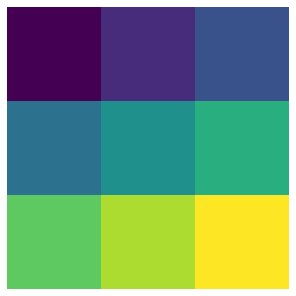

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(constrained_layout=True)
ax.axis("off")

grid = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
ax.imshow(grid)

We can use this to display the results of our simulation, as it creates a 2D array:

In [2]:
with np.load("infection_simulation.npz") as f:
    cells = f["state"]
print(cells)

[[0 1 0 0 1]
 [0 1 1 0 1]
 [0 1 1 1 1]
 [0 1 1 1 1]
 [0 1 1 1 1]]


passing `cells` to `imshow`:

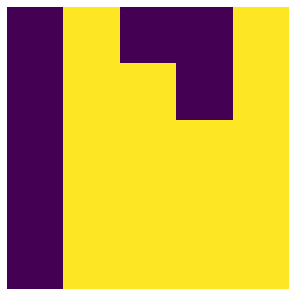

In [3]:
fig, ax = plt.subplots(constrained_layout=True)
ax.axis("off")

ax.imshow(cells)

creates a plot with the default colour scheme. Usually with cellular automata you want to assign specific colours to specific states. In our case we want the healthy cells to be green and the infected cells to be orange.

If we define a colour map with [`ListedColormap`](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.ListedColormap.html) we can give a list of [colour values](https://matplotlib.org/stable/tutorials/colors/colors.html) corresponding to the cell values.

We also specify the `vmin` and `vmax` of the data to make sure that it aligns with our list of colours:

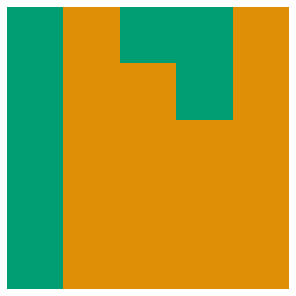

In [4]:
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(constrained_layout=True)
ax.axis("off")

cmap = ListedColormap(["#029e73", "#de8f05"])

ax.imshow(
    cells,
    cmap=cmap,
    vmin=0,
    vmax=1,
)

We can interpret this in the same way as the `print(cells)` output. The first row is the initial state, then each row down the image is another time step.

As ever with a plot, we can save it with `fig.savefig`:

In [5]:
fig.savefig("cells.svg")

## Exercise

Plot the summary grid for the one-dimensional cellular automaton simulation you ran from the last chapter.